In [2]:
import pandas as pd
import numpy as np 
from scipy.stats import chi2, norm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.nonparametric.smoothers_lowess import lowess
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
df_claimants = pd.read_csv("claimants.csv")
print(df_claimants.head(10))
print(df_claimants.shape)

   CASENUM  ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE    LOSS
0        5         0     0.0       1.0       0.0    50.0  34.940
1        3         1     1.0       0.0       0.0    18.0   0.891
2       66         1     0.0       1.0       0.0     5.0   0.330
3       70         0     0.0       1.0       1.0    31.0   0.037
4       96         1     0.0       1.0       0.0    30.0   0.038
5       97         0     1.0       1.0       0.0    35.0   0.309
6       10         0     0.0       1.0       0.0     9.0   3.538
7       36         0     1.0       1.0       0.0    34.0   4.881
8       51         1     1.0       1.0       0.0    60.0   0.874
9       55         1     0.0       1.0       0.0     NaN   0.350
(1340, 7)


In [4]:
df_claimants.isna().sum()

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [5]:
df_claimants1 = df_claimants.dropna()
print(df_claimants1.shape)

(1096, 7)


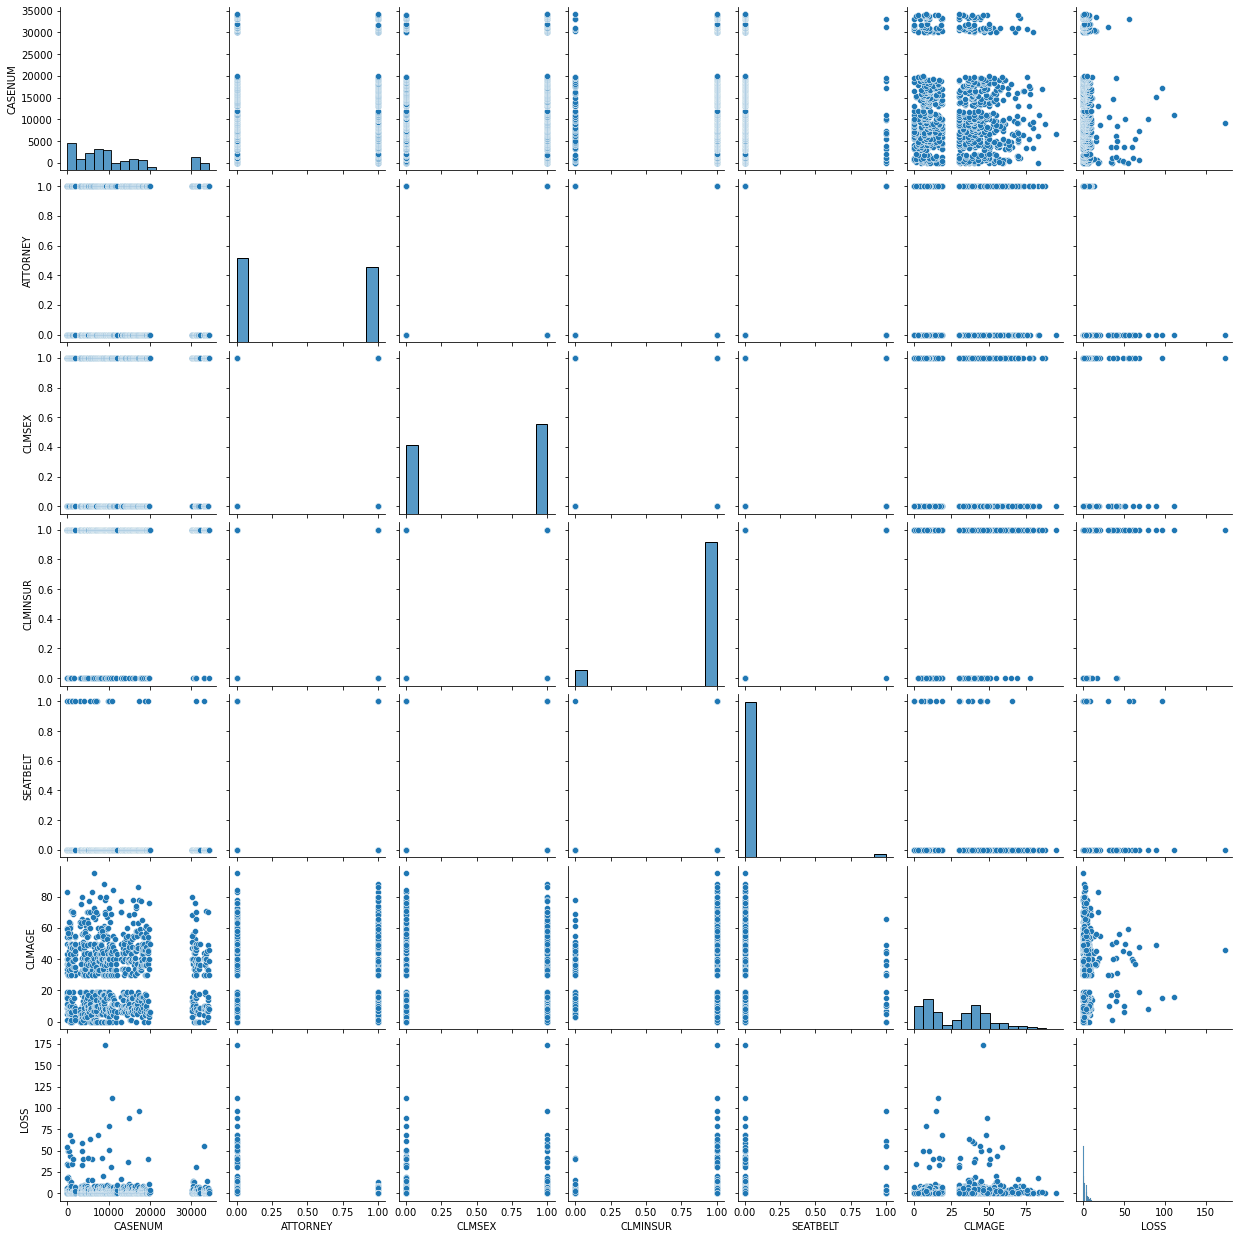

In [11]:
sns.pairplot(df_claimants1)

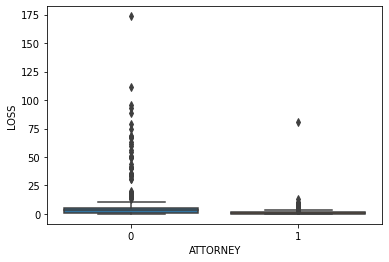

In [6]:
sns.boxplot(data=df_claimants, x="ATTORNEY", y = "LOSS")

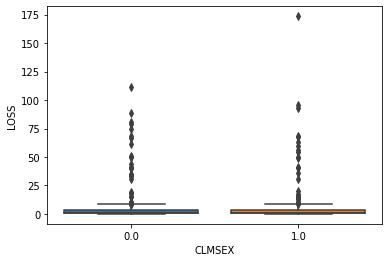

In [7]:
sns.boxplot(data=df_claimants, x="CLMSEX", y = "LOSS")

In [8]:
model = smf.ols(formula="ATTORNEY ~ CLMSEX + CLMINSUR + SEATBELT + CLMAGE + LOSS ", data=df_claimants1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               ATTORNEY   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     15.76
Date:                Sat, 19 Mar 2022   Prob (F-statistic):           5.30e-15
Time:                        08:47:53   Log-Likelihood:                -755.58
No. Observations:                1096   AIC:                             1523.
Df Residuals:                    1090   BIC:                             1553.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3294      0.053      6.239      0.0

In [9]:
results.fittedvalues[results.fittedvalues<0]

147    -0.049860
148    -0.058390
287    -0.160426
333    -0.095690
363    -1.262022
403    -0.053309
415    -0.237862
433    -0.002136
476    -0.279362
599    -0.100109
787    -0.053427
807    -0.700195
813    -0.357804
977    -0.450554
1065   -0.569619
1147   -0.083981
1286   -0.135218
dtype: float64

In [10]:
results.fittedvalues[results.fittedvalues>1]

Series([], dtype: float64)

In [11]:
df_claimants1.columns

Index(['CASENUM', 'ATTORNEY', 'CLMSEX', 'CLMINSUR', 'SEATBELT', 'CLMAGE',
       'LOSS'],
      dtype='object')

In [12]:
X_cols = ['CLMSEX', 'CLMINSUR', 'SEATBELT', 'CLMAGE', 'LOSS']

In [13]:
from sklearn.model_selection import train_test_split
X = df_claimants1[X_cols]
y=df_claimants1["ATTORNEY"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 777)

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(876, 5)
(876,)
(220, 5)
(220,)


In [20]:
#model = smf.logit(formula="ATTORNEY ~ CLMSEX + CLMINSUR + SEATBELT + CLMAGE + LOSS ", data=df_claimants1)
results = sm.Logit(y_train, X_train).fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.593045
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               ATTORNEY   No. Observations:                  876
Model:                          Logit   Df Residuals:                      871
Method:                           MLE   Df Model:                            4
Date:                Sat, 19 Mar 2022   Pseudo R-squ.:                  0.1421
Time:                        08:48:52   Log-Likelihood:                -519.51
converged:                       True   LL-Null:                       -605.53
Covariance Type:            nonrobust   LLR p-value:                 3.801e-36
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CLMSEX         0.4274      0.146      2.930      0.003       0.141       0.713
CLMINSUR       0.4435      0.

coef : the coefficients of the independent variables in the regression equation.
Log-Likelihood : the natural logarithm of the Maximum Likelihood Estimation(MLE) function. MLE is the optimization process of finding the set of parameters that result in the best fit.
LL-Null : the value of log-likelihood of the model when no independent variable is included(only an intercept is included).
Pseudo R-squ. : a substitute for the R-squared value in Least Squares linear regression. It is the ratio of the log-likelihood of the null model to that of the full model.

In [21]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.142     
Dependent Variable: ATTORNEY         AIC:              1049.0152 
Date:               2022-03-19 08:48 BIC:              1072.8921 
No. Observations:   876              Log-Likelihood:   -519.51   
Df Model:           4                LL-Null:          -605.53   
Df Residuals:       871              LLR p-value:      3.8014e-36
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
CLMSEX         0.4274    0.1459   2.9295  0.0034   0.1415   0.7133
CLMINSUR       0.4435    0.1513   2.9314  0.0034   0.1470   0.7400
SEATBELT      -0.7565    0.5695  -1.3283  0.1841  -1.8728   0.3598
CLMAGE         0.0036    0.0035   1.0217  0.3069  -0.0033   0.0105
LOSS          -0.3811    0.0387  -9.8428  0.0000  -0.4570  -0.3052
=================================================================

"""

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
yhat = results.predict(X_test)
print(yhat)

514     5.698582e-01
637     2.922239e-01
1116    6.927212e-01
651     6.016705e-01
1101    5.995208e-01
            ...     
191     1.739864e-01
903     3.302614e-01
8       6.799669e-01
242     4.323559e-07
497     6.773722e-01
Length: 220, dtype: float64


In [23]:
def hl_test(data, g):
    '''
    Hosmer-Lemeshow test to judge the goodness of fit for binary data

    Input: dataframe(data), integer(num of subgroups divided)
    
    Output: float
    '''
    data_st = data.sort_values('prob')
    data_st['dcl'] = pd.qcut(data_st['prob'], g)
    
    ys = data_st['ATTORNEY'].groupby(data_st.dcl).sum()
    yt = data_st['ATTORNEY'].groupby(data_st.dcl).count()
    yn = yt - ys
    
    yps = data_st['prob'].groupby(data_st.dcl).sum()
    ypt = data_st['prob'].groupby(data_st.dcl).count()
    ypn = ypt - yps
    
    hltest = ( ((ys - yps)**2 / yps) + ((yn - ypn)**2 / ypn) ).sum()
    pval = 1 - chi2.cdf(hltest, g-2)
    
    df = g-2
    
    print('\n HL-chi2({}): {}, p-value: {}\n'.format(df, hltest, pval))

796    -0.387218
1252    0.756560
639     0.428028
739    -1.088375
1317   -0.878589
          ...   
778     0.948513
87      0.939627
1138   -0.159521
1005   -0.084791
128     0.353051
Length: 876, dtype: float64

In [30]:
data = pd.DataFrame({"prob": results.predict(X_test) })
data['ATTORNEY'] = y_test
hl_test(data, 10)


 HL-chi2(8): 13.956403936612983, p-value: 0.08290883222619372



In [17]:
prediction_50 = list(map(round, yhat)) ##cutoff at 0.5

In [18]:
df_results = pd.DataFrame({"y_test":y_test,
                           "pred_prob": yhat,
                            "prediction_50": prediction_50})
confusion_matrix(y_true=df_results.y_test, y_pred=df_results.prediction_50)
accuracy_score(y_test, df_results.prediction_50)
print(classification_report(y_test, df_results.prediction_50))

array([[84, 29],
       [24, 83]], dtype=int64)

0.759090909090909

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       113
           1       0.74      0.78      0.76       107

    accuracy                           0.76       220
   macro avg       0.76      0.76      0.76       220
weighted avg       0.76      0.76      0.76       220



In [19]:
df_results["prediction_25"] = df_results.pred_prob.map(lambda x: 1 if x > 0.25 else 0)
df_results["prediction_75"] = df_results.pred_prob.map(lambda x: 1 if x > 0.75 else 0)
df_results["prediction_60"] = df_results.pred_prob.map(lambda x: 1 if x > 0.6 else 0)
df_results["prediction_90"] = df_results.pred_prob.map(lambda x: 1 if x > 0.9 else 0)
df_results.head()
    

,y_test,pred_prob,prediction_50,prediction_25,prediction_75,prediction_60,prediction_90
514,1,0.569858,1,1,0,0,0
637,0,0.292224,0,1,0,0,0
1116,1,0.692721,1,1,0,1,0
651,1,0.601671,1,1,0,1,0
1101,0,0.599521,1,1,0,0,0


In [20]:
confusion_matrix(y_true=df_results.y_test, y_pred=df_results.prediction_25)
accuracy_score(y_test, df_results.prediction_25)
print(classification_report(y_test, df_results.prediction_25))

array([[34, 79],
       [ 8, 99]], dtype=int64)

0.6045454545454545

              precision    recall  f1-score   support

           0       0.81      0.30      0.44       113
           1       0.56      0.93      0.69       107

    accuracy                           0.60       220
   macro avg       0.68      0.61      0.57       220
weighted avg       0.69      0.60      0.56       220



In [21]:
confusion_matrix(y_true=df_results.y_test, y_pred=df_results.prediction_75)
accuracy_score(y_test, df_results.prediction_75)
print(classification_report(y_test, df_results.prediction_75))

array([[112,   1],
       [107,   0]], dtype=int64)

0.509090909090909

              precision    recall  f1-score   support

           0       0.51      0.99      0.67       113
           1       0.00      0.00      0.00       107

    accuracy                           0.51       220
   macro avg       0.26      0.50      0.34       220
weighted avg       0.26      0.51      0.35       220



In [22]:
confusion_matrix(y_true=df_results.y_test, y_pred=df_results.prediction_60)
accuracy_score(y_test, df_results.prediction_60)
print(classification_report(y_test, df_results.prediction_60))

array([[96, 17],
       [43, 64]], dtype=int64)

0.7272727272727273

              precision    recall  f1-score   support

           0       0.69      0.85      0.76       113
           1       0.79      0.60      0.68       107

    accuracy                           0.73       220
   macro avg       0.74      0.72      0.72       220
weighted avg       0.74      0.73      0.72       220



In [23]:
confusion_matrix(y_true=df_results.y_test, y_pred=df_results.prediction_90)
accuracy_score(y_test, df_results.prediction_90)
print(classification_report(y_test, df_results.prediction_90))

array([[113,   0],
       [107,   0]], dtype=int64)

0.5136363636363637

              precision    recall  f1-score   support

           0       0.51      1.00      0.68       113
           1       0.00      0.00      0.00       107

    accuracy                           0.51       220
   macro avg       0.26      0.50      0.34       220
weighted avg       0.26      0.51      0.35       220



In [24]:
from sklearn.metrics import roc_auc_score
roc_score = roc_auc_score(df_results.y_test, df_results.pred_prob)
gini = 2*(roc_score-0.5)
print(roc_score)
print(gini)

0.7836407245058308
0.5672814490116616


In [25]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred_proba = LR.predict_proba(X_test)

LogisticRegression()

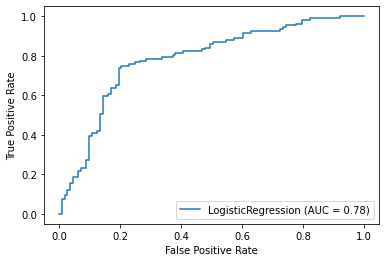

In [26]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(LR, X_test, y_test)
plt.show()


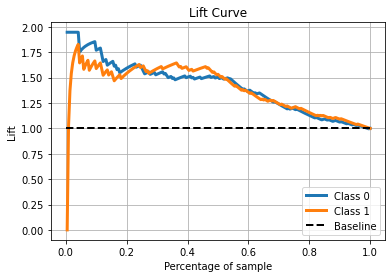

In [27]:
import scikitplot as skplt
skplt.metrics.plot_lift_curve(y_true=y_test, y_probas=y_pred_proba)

In [28]:
df_claimants.ATTORNEY.value_counts()

0    685
1    655
Name: ATTORNEY, dtype: int64

In [37]:
df_results.to_csv("Results.csv")